In [14]:
import pandas as pd

# Load your full dataset
df = pd.read_csv("/content/tweets_with_tickers.csv")  # Replace with actual filename

# Shuffle dataset (optional but recommended)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check data structure
print(df.head())



   tweet_count             UserName  \
0          100              Mr.Saif   
1           70       Daniel Osinaga   
2            2          Bill Madden   
3          181   Merlijn The Trader   
4          220  The DeFi Investor 🔎   

                                                text  \
0  (stock, options Trader's)  𝒋𝒐𝒊𝒏 𝒖𝒔 𝒕𝒐𝒅𝒂𝒚✅ $AHR...   
1                      $META https://t.co/epwxPTLOtq   
2  Liberation Day is now a day of infamy: Hands d...   
3  $BTC is at the edge of another breakout.\n\nSa...   
4  Crypto Watchlist for the week ahead:\n\n$BTC -...   

                       created_at  retweet_count  likes ticker  
0  Fri Apr 04 11:48:53 +0000 2025              0      2   AMZN  
1  Thu Apr 03 17:08:55 +0000 2025              1     18   META  
2  Wed Apr 02 22:05:06 +0000 2025            282    901  GOOGL  
3  Thu Apr 03 18:00:00 +0000 2025             44    473    BTC  
4  Sun Mar 30 10:10:38 +0000 2025             68    273    BTC  


In [17]:
from sklearn.model_selection import train_test_split

# Assuming 'text' is the column with tweets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save training & testing datasets
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print(f"Training samples: {len(train_df)}, Testing samples: {len(test_df)}")


Training samples: 3539, Testing samples: 885


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
import pandas as pd

# Load training data
train_df = pd.read_csv("train_data.csv")

# Extract tweets
tweets_train = train_df["text"].astype(str).tolist()

# Define Tokenizer
vocab_size = 10000  # Keep this consistent with the model
oov_token = "<OOV>"  # Handles unknown words

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(tweets_train)

# Save the tokenizer for future use
with open("tokenizer.pkl", "wb") as file:
    pickle.dump(tokenizer, file)

print("Tokenizer trained and saved successfully! ")


Tokenizer trained and saved successfully! 


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load test data
test_df = pd.read_csv("test_data.csv")

# Extract tweets from both datasets
tweets_test = test_df["text"].astype(str).tolist()

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(tweets_train)
test_sequences = tokenizer.texts_to_sequences(tweets_test)

# Pad sequences to match model input size
max_length = 50  # Ensure this matches the training setup
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

print("Train and test sequences ready! ")


Train and test sequences ready! 


In [20]:
import numpy as np

# Save tokenized data for future use
np.save("train_padded.npy", train_padded)
np.save("test_padded.npy", test_padded)

print("Preprocessed data saved! ")


Preprocessed data saved! 


In [21]:
import os

# List all files in the current directory
print(os.listdir())


['.config', 'tokenizer.pkl', 'test_padded.npy', 'lstm_stock_model.keras', 'Model.py', 'train_data.csv', 'tweets_with_tickers.csv', 'lstm_stock_model.h5', 'lstm_stock_fusion_model.keras', 'test_data.csv', 'train_padded.npy', 'merged_tweets_stock_data_nearest_date.csv', 'sample_data']


In [23]:
import pandas as pd

# Load your full dataset
df = pd.read_csv("/content/merged_tweets_stock_data_nearest_date.csv")  # Replace with actual filename

# Shuffle dataset (optional but recommended)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check data structure
print(df.head())


   tweet_count                                UserName  \
0           42                             Ufo Calls 🛸   
1          481                      💎 Diamond Trades 💎   
2          791  Danny Marques | Investing Informant 📊📈   
3          363                      Stockwits Acade〽️y   
4          166                            Jake Friedel   

                                                text  \
0  🚨BREAKING:   \n\nTRUMP'S CRYPTO PORTFOLIO IS F...   
1  $nvda $aapl $spx $qqq $spy $vix\n\nKeep it sim...   
2  But let's look at the why to BTCs underperform...   
3  ADDING TO OUR LOTTO PLAY $NVDA 120 CALL APRIL ...   
4  $GME $BTC $SPY\n"Just don't fucking dance" htt...   

                       created_at  retweet_count  likes ticker  \
0  Thu Apr 03 08:40:09 +0000 2025             29    216    ETH   
1  Thu Apr 03 16:56:53 +0000 2025              3     44   NVDA   
2  Fri Mar 28 03:15:47 +0000 2025              0      8  GOOGL   
3  Wed Apr 02 14:32:42 +0000 2025              0  

In [24]:
from sklearn.model_selection import train_test_split

# Assuming 'text' is the column with tweets
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)

# Save training & testing datasets
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print(f"Training samples: {len(train_df)}, Testing samples: {len(test_df)}")


Training samples: 16375, Testing samples: 7018


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
import pandas as pd

# Load training data
train_df = pd.read_csv("train_data.csv")

# Extract tweets
tweets_train = train_df["text"].astype(str).tolist()

# Define Tokenizer
vocab_size = 10000  # Keep this consistent with the model
oov_token = "<OOV>"  # Handles unknown words

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(tweets_train)

# Save the tokenizer for future use
with open("tokenizer.pkl", "wb") as file:
    pickle.dump(tokenizer, file)

print("Tokenizer trained and saved successfully! 🎉")


Tokenizer trained and saved successfully! 🎉


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load test data
test_df = pd.read_csv("test_data.csv")

# Extract tweets from both datasets
tweets_test = test_df["text"].astype(str).tolist()

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(tweets_train)
test_sequences = tokenizer.texts_to_sequences(tweets_test)

# Pad sequences to match model input size
max_length = 50  # Ensure this matches the training setup
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

print("Train and test sequences ready! 🔥")


Train and test sequences ready! 🔥


In [29]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/merged_tweets_stock_data_nearest_date.csv")

# Ensure it's sorted by date
df = df.sort_values(by="Date")

# Generate labels based on price change
df["label"] = (df["Close"].diff() > 0).astype(int)

# Remove the first row (NaN due to diff)
df = df.iloc[1:].reset_index(drop=True)

# Save the labeled dataset
df.to_csv("labeled_dataset.csv", index=False)

print("Labels generated and saved successfully! ")


Labels generated and saved successfully! 


In [31]:
df["price_change"] = df["Close"].pct_change() * 100  # Convert to percentage
df["label"] = df["price_change"].apply(lambda x: 1 if x > 1 else (0 if x < -1 else -1))


In [32]:
df.head()

,tweet_count,UserName,text,created_at,retweet_count,likes,ticker,Nearest_Trading_Date,Date,Close,High,Low,Open,Volume,Ticker,label,price_change
0,103,Bill Madden,The loathsome piece of shit publicly begging F...,Fri Apr 04 17:38:19 +0000 2025,38,79,GOOGL,2024-11-02,2024-11-02,69289.273438,69867.351562,69033.718750,69486.023438,18184612091,BTC-USD,-1,NaN
1,103,Bill Madden,The loathsome piece of shit publicly begging F...,Fri Apr 04 17:38:19 +0000 2025,38,79,GOOGL,2024-11-02,2024-11-02,2491.068604,2522.360596,2471.955566,2512.208252,9639457439,ETH-USD,0,-96.404828
2,237,"Andrew Freedman, CFA 🦅",Did someone really come out and compare $GOOGL...,Tue Apr 01 03:15:02 +0000 2025,2,123,GOOGL,2024-11-02,2024-11-02,2491.068604,2522.360596,2471.955566,2512.208252,9639457439,ETH-USD,-1,0.000000
3,168,Compounding Girl,How can I short things?\n\nAsking for a friend...,Wed Apr 02 21:15:37 +0000 2025,1,28,AMZN,2024-11-02,2024-11-02,69289.273438,69867.351562,69033.718750,69486.023438,18184612091,BTC-USD,1,2681.508038
4,168,Compounding Girl,How can I short things?\n\nAsking for a friend...,Wed Apr 02 21:15:37 +0000 2025,1,28,AMZN,2024-11-02,2024-11-02,2491.068604,2522.360596,2471.955566,2512.208252,9639457439,ETH-USD,0,-96.404828


In [33]:
import numpy as np

# Load preprocessed data
padded_tweets = np.load("/content/train_padded.npy")
scaled_stock_data = np.load("scaled_stock_data.npy")
labels = np.load("labels.npy")

print(f"✅ Data Loaded: Tweets {padded_tweets.shape}, Stock {scaled_stock_data.shape}, Labels {labels.shape}")


FileNotFoundError: [Errno 2] No such file or directory: 'padded_tweets.npy'

In [37]:
import numpy as np
import pandas as pd
import pickle
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import MinMaxScaler

# Load merged dataset
df = pd.read_csv("/content/merged_tweets_stock_data_nearest_date.csv")
df = df.sort_values(by="Date").reset_index(drop=True)  # Sort for time series

# --------------------- Tokenize Tweets ---------------------
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])

tweet_sequences = tokenizer.texts_to_sequences(df["text"])
padded_tweets = pad_sequences(tweet_sequences, maxlen=50, padding="post")

# Save tokenizer
with open("tokenizer.pkl", "wb") as file:
    pickle.dump(tokenizer, file)

np.save("padded_tweets.npy", padded_tweets)
print("✅ Tokenized tweets saved!")

# --------------------- Normalize Stock Prices ---------------------
stock_features = ["Open", "High", "Low", "Close", "Volume"]
scaler = MinMaxScaler()
scaled_stock_data = scaler.fit_transform(df[stock_features])

# Save scaler
joblib.dump(scaler, "scaler.pkl")

np.save("scaled_stock_data.npy", scaled_stock_data)
print("✅ Scaled stock prices saved!")

# --------------------- Generate Labels ---------------------
df["label"] = (df["Close"].diff() > 0).astype(int)  # 1 = up, 0 = down
df = df.iloc[1:].reset_index(drop=True)  # Remove NaN row

labels = df["label"].values
np.save("labels.npy", labels)
print("✅ Labels saved!")

print("🎯 All preprocessed data saved successfully!")


✅ Tokenized tweets saved!
✅ Scaled stock prices saved!
✅ Labels saved!
🎯 All preprocessed data saved successfully!


In [38]:
import os
print(os.listdir())  # Should show: tokenizer.pkl, padded_tweets.npy, scaled_stock_data.npy, labels.npy


['.config', 'tokenizer.pkl', 'labels.npy', 'test_padded.npy', 'ConfigLoader.py', 'lstm_stock_model.keras', 'Model.py', 'train_data.csv', 'padded_tweets.npy', 'tweets_with_tickers.csv', 'lstm_stock_model.h5', 'scaled_stock_data.npy', 'lstm_stock_fusion_model.keras', 'scaler.pkl', 'test_data.csv', 'train_padded.npy', 'labeled_dataset.csv', 'merged_tweets_stock_data_nearest_date.csv', 'sample_data']


In [39]:
import numpy as np

# Load preprocessed data
padded_tweets = np.load("padded_tweets.npy")
scaled_stock_data = np.load("scaled_stock_data.npy")
labels = np.load("labels.npy")

print(f"✅ Data Loaded: Tweets {padded_tweets.shape}, Stock {scaled_stock_data.shape}, Labels {labels.shape}")


✅ Data Loaded: Tweets (23393, 50), Stock (23393, 5), Labels (23392,)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ tweet_input (InputLayer)  │ (None, 50)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 50, 128)        │      1,280,000 │ tweet_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 50)             │              0 │ tweet_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stock_input (InputLayer)  │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         49,408 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │            192 │ stock_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 96)             │              0 │ lstm[0][0],            │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          3,104 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             33 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,332,737 (5.08 MB)

 Trainable params: 1,332,737 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: Found input variables with inconsistent numbers of samples: [23393, 23393, 23392]

In [42]:
import numpy as np

padded_tweets = np.load("padded_tweets.npy")
scaled_stock_data = np.load("scaled_stock_data.npy")
labels = np.load("labels.npy")

print(f"Tweets Shape: {padded_tweets.shape}")
print(f"Stock Shape: {scaled_stock_data.shape}")
print(f"Labels Shape: {labels.shape}")


Tweets Shape: (23393, 50)
Stock Shape: (23393, 5)
Labels Shape: (23392,)


In [43]:
import numpy as np

# Load data
padded_tweets = np.load("padded_tweets.npy")
scaled_stock_data = np.load("scaled_stock_data.npy")
labels = np.load("labels.npy")

# Ensure all datasets are the same length
min_length = min(len(padded_tweets), len(scaled_stock_data), len(labels))

# Trim datasets to match the smallest size
padded_tweets = padded_tweets[:min_length]
scaled_stock_data = scaled_stock_data[:min_length]

# Save the fixed datasets
np.save("padded_tweets.npy", padded_tweets)
np.save("scaled_stock_data.npy", scaled_stock_data)

print(f"✅ Fixed Shapes: Tweets {padded_tweets.shape}, Stock {scaled_stock_data.shape}, Labels {labels.shape}")


✅ Fixed Shapes: Tweets (23392, 50), Stock (23392, 5), Labels (23392,)


In [44]:
print(padded_tweets.shape)
print(scaled_stock_data.shape)
print(labels.shape)


(23392, 50)
(23392, 5)
(23392,)


In [45]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate

# Define placeholders (since Jupyter doesn't support TensorFlow session placeholders)
tweet_input = Input(shape=(padded_tweets.shape[1],), name="tweet_input")
stock_input = Input(shape=(scaled_stock_data.shape[1],), name="stock_input")

# LSTM for tweets
embedding = Embedding(input_dim=10000, output_dim=128, mask_zero=True)(tweet_input)
lstm_out = LSTM(64)(embedding)

# Dense layer for stock prices
stock_dense = Dense(32, activation="relu")(stock_input)

# Merge both
merged = Concatenate()([lstm_out, stock_dense])
dense_out = Dense(32, activation="relu")(merged)
output = Dense(1, activation="sigmoid")(dense_out)  # Binary classification (Up/Down)

# Build model
model = tf.keras.Model(inputs=[tweet_input, stock_input], outputs=output)

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display model summary
model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ tweet_input (InputLayer)  │ (None, 50)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 50, 128)        │      1,280,000 │ tweet_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 50)             │              0 │ tweet_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stock_input (InputLayer)  │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 64)             │         49,408 │ embedding_1[0][0],     │
│                           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │            192 │ stock_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 96)             │              0 │ lstm_1[0][0],          │
│ (Concatenate)             │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │          3,104 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             33 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,332,737 (5.08 MB)

 Trainable params: 1,332,737 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from sklearn.model_selection import train_test_split

# Split dataset into training and validation
X_tweets_train, X_tweets_val, X_stock_train, X_stock_val, y_train, y_val = train_test_split(
    padded_tweets, scaled_stock_data, labels, test_size=0.2, random_state=42
)

# Train the model
model.fit(
    [X_tweets_train, X_stock_train], y_train,
    validation_data=([X_tweets_val, X_stock_val], y_val),
    batch_size=32,
    epochs=10
)

# Save the trained model
model.save("stock_prediction_model.keras")

print("✅ Training complete and model saved! 🚀")


Epoch 1/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.6443 - loss: 0.5734 - val_accuracy: 0.7093 - val_loss: 0.5260
Epoch 2/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.6997 - loss: 0.5298 - val_accuracy: 0.7023 - val_loss: 0.5325
Epoch 3/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.7201 - loss: 0.5059 - val_accuracy: 0.6991 - val_loss: 0.5421
Epoch 4/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7362 - loss: 0.4804 - val_accuracy: 0.6645 - val_loss: 0.5574
Epoch 5/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.7627 - loss: 0.4481 - val_accuracy: 0.6636 - val_loss: 0.5888
Epoch 6/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.7768 - loss: 0.4221 - val_accuracy: 0.6863 - val_loss: 0.5941
Epoch 7/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7920 - loss: 0.3993 - val_accuracy: 0.6807 - val_loss: 0.6346
Epoch 8/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8003 - loss: 0.3832 - 

In [47]:
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("stock_prediction_model.keras")

# Predict using validation data
predictions = model.predict([X_tweets_val, X_stock_val])

# Show first 5 predictions
print(predictions[:5])


147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
[[0.17617898]
 [0.93631226]
 [0.6699012 ]
 [0.4577889 ]
 [0.2919726 ]]


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load merged dataset
df = pd.read_csv("/content/labeled_dataset.csv")

# Select relevant numerical columns
stock_features = ["Open", "High", "Low", "Close", "Volume"]
df_selected = df[stock_features]

# Compute correlation matrix
correlation_matrix = df_selected.corr()

# Display correlation values
print(correlation_matrix)


            Open      High       Low     Close    Volume
Open    1.000000  0.999757  0.999741  0.999546  0.739279
High    0.999757  1.000000  0.999652  0.999807  0.744508
Low     0.999741  0.999652  1.000000  0.999751  0.734556
Close   0.999546  0.999807  0.999751  1.000000  0.740849
Volume  0.739279  0.744508  0.734556  0.740849  1.000000


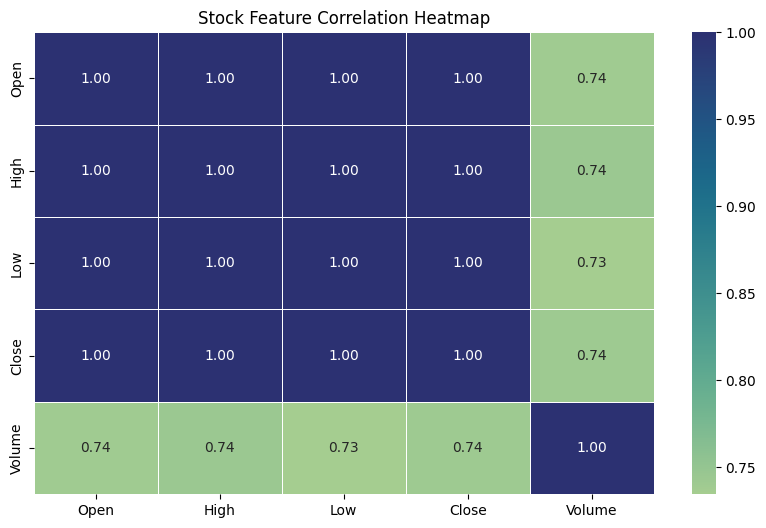

In [54]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Stock Feature Correlation Heatmap")

# Show plot
plt.show()


In [58]:
!python Model.py


2025-04-08 19:14:55.517388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744139695.541618   50026 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744139695.548961   50026 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/content/Model.py", line 6, in <module>
    import neural as neural
  File "/content/neural.py", line 4, in <module>
    import tensorflow.contrib.distributions as ds
ModuleNotFoundError: No module named 'tensorflow.contrib'
